In [80]:
# Weizhe Guo
# Oct 10th 2018
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
import sklearn.metrics

num_pred = 5000

df = pd.DataFrame(np.random.normal(0, 1, size=(50,5000)).astype(np.float32))
x = df.copy()

y = np.hstack((np.zeros(25),np.ones(25)))
random.shuffle(y)

df['target'] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,target
0,-0.977785,-0.106980,0.763849,0.742905,-0.552218,-0.580197,0.358664,1.574469,1.357823,0.118372,...,0.712322,-0.731956,-0.608379,-0.590787,0.869450,-0.403814,1.165266,-0.909024,-0.536386,0.0
1,-0.186673,-0.883358,-0.255199,0.633539,-1.875810,-1.230703,0.082797,-0.326904,0.961917,1.101874,...,0.760926,-0.497776,0.426173,-0.513021,-1.133707,0.241350,-0.718777,-1.298027,-1.555230,1.0
2,-0.063452,0.191452,0.561264,-0.650824,0.198555,0.243571,-0.607082,0.174371,-0.810086,0.437259,...,1.382655,0.256860,-0.640723,0.591531,-2.192292,2.260488,-0.345750,-1.779267,0.777999,0.0
3,-0.311741,-0.341135,0.706517,-0.424569,1.397418,-0.304486,-0.122573,-1.311878,-0.696123,0.155481,...,-0.130042,-0.203032,-1.463549,-1.913738,1.298719,0.872560,0.858468,0.580325,-0.045194,0.0
4,-0.798513,-0.294098,-2.234500,0.208187,1.785191,0.259976,0.324820,-1.212331,1.460199,-0.423443,...,0.924713,0.021987,-0.077208,-1.152505,-0.504336,-0.816697,-1.237752,1.381503,-1.085933,1.0


In [64]:
corr = df.corr()['target']
corr = corr.abs().sort_values(ascending=False)[0:100]

corr = corr.iloc[1:,]
print(corr.shape)

(99,)

In [89]:
features = corr.index.values
#print(features.shape)
sample = np.random.randint(0,50,size=10)

x_w = df[corr.index.values]
df2 = df.iloc[sample,features]
df2['target'] = y[sample]
corr2 = df2.corr()['target']
#print(df2.head)

wrong_log = LogisticRegressionCV(cv=5).fit(x_w,y)
pred = wrong_log.predict(x_w)
err = mean_squared_error(y,pred)
print("The wrong way has avg mse:", err)

The wrong way has error: 0.1


(array([ 4., 13., 16., 18., 23., 13.,  8.,  3.,  2.]),
 array([-0.639556  , -0.45738311, -0.27521022, -0.09303733,  0.08913556,
         0.27130844,  0.45348133,  0.63565422,  0.81782711,  1.        ]),
 <a list of 9 Patch objects>)

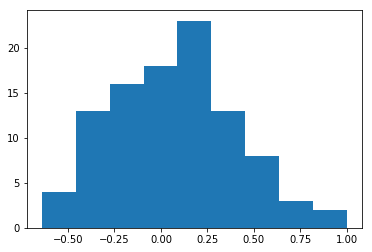

In [90]:
#The wrong way plot
plt.hist(corr2, bins='auto')

In [95]:
# The right way
kf = StratifiedKFold(n_splits=5)
mse = []

for train, test in kf.split(x,y):
    trainfold = df.iloc[train]
    testfold = df.iloc[test]
    
    corr3 = trainfold.corr()['target']
    corr3 = corr3.abs().sort_values(ascending=False)[0:100]

    
    df3 = testfold[corr.index.values]
    df3['target'] = y[test]
    corr3 = df3.corr()['target']
    
    trainfold_x  = trainfold[corr.index.values]
    trainfold_y = trainfold['target']
    
    right_log = LogisticRegressionCV(cv=5).fit(trainfold_x, trainfold_y)
    
    y_pred = right_log.predict(testfold[corr.index.values])
    mse.append(mean_squared_error(testfold['target'], y_pred))
    
print("The right way has avg mse:", np.array(mse).mean())

The right way has avg mse: 0.44000000000000006


(array([ 3., 10., 14., 23., 19., 16.,  6.,  7.,  2.]),
 array([-0.78984812, -0.59097611, -0.3921041 , -0.19323208,  0.00563993,
         0.20451195,  0.40338396,  0.60225597,  0.80112799,  1.        ]),
 <a list of 9 Patch objects>)

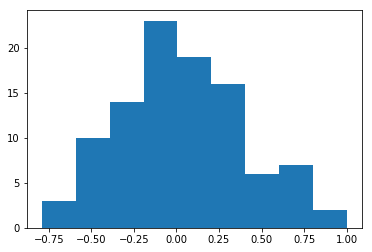

In [93]:
# The right way correlation plot
plt.hist(corr3, bins='auto')